# German eBay Car Sales Analysis

![image](https://i.imgur.com/GcK6W4U.png)

This dataset introduces the classifieds section of the German eBay website. Our goal is to clean this dataset and analyze the used car listings that are present in the dataset.

## Exploring the Data

In [1]:
# Load all the packages that we'll be using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
autos = pd.read_csv('autos.csv', encoding='latin-1')
%matplotlib inline

In [2]:
# Taking a glance at the dataset
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [4]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


From my observations of the data thus far, we have 20 columns in this data set and there are five columns that have null values out of these 20. They are: `vehicleType`, `gearbox`,`model`,`fuelType`,`notRepairedDamage`

Next we're going to check our columns to make sure that they are in an easy-to-work with format in the following cells.

In [5]:
autos.columns 

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
snakecase_names = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_of_pictures', 'postal_code',
       'last_seen']

In [7]:
autos.columns = snakecase_names

In [8]:
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

This is what we did in the previous few cells:
* Accessed our columns using the `columns`  to display an array
* Copied the array to `snakecase_names` and changed the index names into snakecase format
* Reassigned `snakecase_names` to `autos.columns`

The work I did here will make our columns easier to read, and if need be, easier to transform!

In [9]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-30 19:48:02,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


After using the `describe` command, this is what I can determine:
* We can definitely drop both the 'seller' and 'offer_type' columns, since they have both have values that occur 49999 (out of a possible 50000) times.
* We can also drop num_of_pictures there's only one unique value of just 0

In [10]:
# Drop seller, offer_type, and num_of_pictures columns
autos = autos.drop(columns=['seller','offer_type', 'num_of_pictures'])

Next in two of the colums, `price` and `odometer` we have some characters present that will be a hindrance to us if we want to perform calculations in the near future. Let's clean them up!

In [11]:
autos['price']

0         $5,000
1         $8,500
2         $8,990
3         $4,350
4         $1,350
          ...   
49995    $24,900
49996     $1,980
49997    $13,200
49998    $22,900
49999     $1,250
Name: price, Length: 50000, dtype: object

In [12]:
autos['odometer']

0        150,000km
1        150,000km
2         70,000km
3         70,000km
4        150,000km
           ...    
49995    100,000km
49996    150,000km
49997      5,000km
49998     40,000km
49999    150,000km
Name: odometer, Length: 50000, dtype: object

In [13]:
# Remove non-numeric charcters and convert dtypes for price and odometer columns to numeric values

autos['price'] = autos['price'].str.replace('$', '').str.replace(',','')
autos['odometer'] = autos['odometer'].str.replace('km', '').str.replace(',','')
autos['price'] = autos['price'].astype(int)
autos['odometer'] = autos['odometer'].astype(int)

# Lastly we'll rename 'odometer' to odometer_km so that our audience will know that the units are in km
autos = autos.rename(columns={"odometer": "odometer_km"})


Check to see whether our conversion of the two columns ```price``` and `odometer` to a numeric dtype were successful as well as our renaming `odometer` to `odometer_km`

In [14]:
autos['price'].value_counts().sort_index(ascending=False).tail(15)

18       1
17       3
15       2
14       1
13       2
12       3
11       2
10       7
9        1
8        1
5        2
3        1
2        3
1      156
0     1421
Name: price, dtype: int64

In [15]:
autos['odometer_km'].value_counts().sort_index(ascending=False)

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
40000       819
30000       789
20000       784
10000       264
5000        967
Name: odometer_km, dtype: int64

Our conversion was successful! 

Next we want to get rid of values in `odometer_km` and `prices` that don't seem to be within the scope of realistic expectations that we would have for used vehicles.

In [16]:
# Remove rows with unrealistic prices
autos = autos[autos['price'].between(1000, 1000000)]

In [17]:
autos['price'].describe()

count     38629.000000
mean       7332.474359
std       13060.890754
min        1000.000000
25%        2200.000000
50%        4350.000000
75%        8950.000000
max      999999.000000
Name: price, dtype: float64

In the above transformations, I didn't make any changes to the `odometer_km` column, because all the values were seen as necessary and realistic. But I did however, make changes to the `price` column because there were a lot of unrealistic prices for cars that were both too low and too high

In [18]:
(autos[['date_crawled', 'last_seen', 'ad_created']].
     sort_values(by=['ad_created'], ascending=True)
     .tail(10)
       
)

,date_crawled,last_seen,ad_created
38743,2016-04-07 02:36:24,2016-04-07 02:36:24,2016-04-07 00:00:00
47885,2016-04-07 00:36:33,2016-04-07 00:36:33,2016-04-07 00:00:00
13976,2016-04-07 10:36:17,2016-04-07 10:36:17,2016-04-07 00:00:00
4378,2016-04-07 14:36:55,2016-04-07 14:36:55,2016-04-07 00:00:00
37112,2016-04-07 07:36:24,2016-04-07 07:36:24,2016-04-07 00:00:00
30532,2016-04-07 01:36:35,2016-04-07 01:36:35,2016-04-07 00:00:00
24853,2016-04-07 08:25:34,2016-04-07 09:06:16,2016-04-07 00:00:00
29938,2016-04-07 11:36:23,2016-04-07 11:36:23,2016-04-07 00:00:00
1138,2016-04-07 01:36:16,2016-04-07 01:36:16,2016-04-07 00:00:00
47588,2016-04-07 03:36:24,2016-04-07 03:36:24,2016-04-07 00:00:00


In [19]:
# autos['date_crawled'] = autos['date_crawled'].str[:10]
# autos['last_seen'] = autos['last_seen'].str[:10]
# autos['ad_created'] = autos['ad_created'].str[:10]    

In [20]:
(autos["ad_created"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index(ascending=True).tail(37)
        )

2016-03-02    0.000129
2016-03-03    0.000854
2016-03-04    0.001527
2016-03-05    0.023040
2016-03-06    0.015144
2016-03-07    0.033809
2016-03-08    0.032566
2016-03-09    0.032644
2016-03-10    0.032980
2016-03-11    0.033058
2016-03-12    0.037122
2016-03-13    0.017655
2016-03-14    0.034974
2016-03-15    0.033446
2016-03-16    0.029641
2016-03-17    0.030185
2016-03-18    0.013280
2016-03-19    0.034068
2016-03-20    0.038261
2016-03-21    0.037588
2016-03-22    0.032307
2016-03-23    0.031945
2016-03-24    0.029020
2016-03-25    0.030676
2016-03-26    0.033213
2016-03-27    0.031272
2016-03-28    0.035388
2016-03-29    0.033990
2016-03-30    0.032903
2016-03-31    0.031557
2016-04-01    0.034456
2016-04-02    0.035957
2016-04-03    0.039452
2016-04-04    0.037278
2016-04-05    0.011986
2016-04-06    0.003365
2016-04-07    0.001320
Name: ad_created, dtype: float64

There are 74 unique values in our `ad_created` column. This means that we have a wide variety of dates where our listings are created with the oldest being 9 months older than the more recent months

In [21]:
(autos['date_crawled']
     .str[:10]
     .value_counts(normalize=True, dropna=False)
     .sort_index()
)

2016-03-05    0.025551
2016-03-06    0.013876
2016-03-07    0.035129
2016-03-08    0.032618
2016-03-09    0.032463
2016-03-10    0.033317
2016-03-11    0.032799
2016-03-12    0.037381
2016-03-13    0.015998
2016-03-14    0.036631
2016-03-15    0.033628
2016-03-16    0.029071
2016-03-17    0.030495
2016-03-18    0.012840
2016-03-19    0.035129
2016-03-20    0.038158
2016-03-21    0.037304
2016-03-22    0.032514
2016-03-23    0.032204
2016-03-24    0.029020
2016-03-25    0.030521
2016-03-26    0.033110
2016-03-27    0.031401
2016-03-28    0.035362
2016-03-29    0.033990
2016-03-30    0.033058
2016-03-31    0.031401
2016-04-01    0.034611
2016-04-02    0.036294
2016-04-03    0.039142
2016-04-04    0.036863
2016-04-05    0.013358
2016-04-06    0.003262
2016-04-07    0.001501
Name: date_crawled, dtype: float64

The `date_crawled` column has consecutive dates from early March to April. It also appears to have a pretty solid correlation with the `ad_created` column for the same date, meaning that the date that the ad is first crawled relates strongly to when the ad is first created.

About half of the listings were accessed by the crawler in the last three days that we have on record for our data. And the difference is about 6-10x the previous rates. So it's strange, but since none of our date columns have any value that goes further than `2016-04-07`, we can probably assume that this discrepancy is possibly due to the crawler not pulling any data beyond that point.

In [22]:
(autos['last_seen']
     .str[:10]
     .value_counts(normalize=True, dropna=False)
     .sort_index()
)

2016-03-05    0.001087
2016-03-06    0.003572
2016-03-07    0.004556
2016-03-08    0.006239
2016-03-09    0.008905
2016-03-10    0.009811
2016-03-11    0.011727
2016-03-12    0.022185
2016-03-13    0.008387
2016-03-14    0.011986
2016-03-15    0.014989
2016-03-16    0.015455
2016-03-17    0.026379
2016-03-18    0.007378
2016-03-19    0.014600
2016-03-20    0.019804
2016-03-21    0.019674
2016-03-22    0.020787
2016-03-23    0.017914
2016-03-24    0.018535
2016-03-25    0.017759
2016-03-26    0.016076
2016-03-27    0.014083
2016-03-28    0.019441
2016-03-29    0.020787
2016-03-30    0.023454
2016-03-31    0.022729
2016-04-01    0.023195
2016-04-02    0.024904
2016-04-03    0.024438
2016-04-04    0.023376
2016-04-05    0.131119
2016-04-06    0.234694
2016-04-07    0.139973
Name: last_seen, dtype: float64

In [23]:
# Print out our registration years
print(autos['registration_year']
     .value_counts(dropna=False)
     .sort_index()
)

print(autos['registration_year'].describe())

1000    1
1001    1
1927    1
1929    1
1931    1
       ..
5911    1
6200    1
8888    1
9000    1
9999    2
Name: registration_year, Length: 91, dtype: int64
count    38629.000000
mean      2005.678713
std         86.681928
min       1000.000000
25%       2001.000000
50%       2005.000000
75%       2009.000000
max       9999.000000
Name: registration_year, dtype: float64


Looking at the data in `registration_year` column, we can see that there are quite a few oddities in here.

In [24]:
# Filter out anything that is after the year 2016 and before the 1900s
odd_values = autos[(autos['registration_year'] > 2016) | 
                   (autos['registration_year'] < 1900)].index

# Drop them from our table
autos.drop(odd_values, inplace=True)

I decided to created a `|` filter that isolated rows with `registration_year` values `> 2016` or `< 1900`. My reasoning for deciding my filter criteria was based on the fact that there definitely could be some vintage vehicles that were registered in the early decades of the 1900s. As for filtering out values on the opposite end of the spectrum, because our data is only supposed to go up to 2016, I also dropped data after this point as it isn't accurate. There were a lot of rows that contained `2017` as a value, but that would be inaccurate as a car can't be registered **after** it has already been posted/seen on eBay.

In [25]:
# Print out registration_year values to get a feel for the data
print((autos['registration_year']
     .value_counts(normalize=True)
     .sort_values(ascending=False)
))
# Print out a small sample of the data—the first 15 values in descending order
sample = autos['registration_year'].value_counts(normalize=True).sort_values(ascending=False).head(15)
print(sample)
print('\n')
# Sum the sample to get the percentage and convert it to a string to print a statment
print("These 15 rows impact " + str(sample.sum() * 100) + "%" " of our data")

2005    0.074847
2006    0.071246
2004    0.070091
2003    0.066570
2007    0.060711
          ...   
1929    0.000027
1927    0.000027
1943    0.000027
1953    0.000027
1952    0.000027
Name: registration_year, Length: 77, dtype: float64
2005    0.074847
2006    0.071246
2004    0.070091
2003    0.066570
2007    0.060711
2008    0.059233
2002    0.057379
2009    0.055820
2001    0.055497
2000    0.053777
1999    0.046333
2011    0.043457
2010    0.042570
2012    0.035099
1998    0.034481
Name: registration_year, dtype: float64


These 15 rows impact 82.7111720282727% of our data


With our truncated `registration_year` column, it now stands at 77 rows. I took 15 of the highest recurring `registration_year` values in descending order and added them up. The result that I got after adding them together and multiplying by 100 was `82.7111720282727` This indicates that about 83 percent of the cars in our dataset were registered between the years 1998 to 2012. And the years that have that have the highest registration in order are `2005`, `2006`, and `2004`.

In [26]:
# Check to see the top brands that make up the highest percentage of the brand column
autos['brand'].value_counts(normalize=True)

volkswagen        0.210836
bmw               0.125346
mercedes_benz     0.111586
audi              0.097584
opel              0.089064
ford              0.058722
renault           0.037276
peugeot           0.027896
fiat              0.021070
skoda             0.019055
seat              0.017281
smart             0.016609
toyota            0.014620
mazda             0.014244
citroen           0.013894
nissan            0.013626
mini              0.010884
hyundai           0.010750
sonstige_autos    0.010454
volvo             0.008976
kia               0.007686
porsche           0.007471
honda             0.007337
mitsubishi        0.006880
chevrolet         0.006611
alfa_romeo        0.006235
suzuki            0.005724
dacia             0.003279
chrysler          0.003171
jeep              0.002768
land_rover        0.002634
jaguar            0.001854
subaru            0.001720
daihatsu          0.001693
saab              0.001371
daewoo            0.000914
trabant           0.000860
r

To determine the top brands in our `brand` column, I decided to choose the six most commonly occuring values aka the 'top brands' in that column. In order, it goes: ```volkswagen, bmw, mercedes_benz, audi, opel, ford```.

In [27]:
autos['brand'].value_counts(normalize=True).index
top_brands = ['volkswagen', 'bmw', 'mercedes_benz', 'audi', 'opel', 'ford']

counter = 0 
for brand in top_brands:
    if counter == 0:
        filtered = pd.concat([pd.DataFrame(), autos[autos['brand'] == brand]], axis=0)
    else:
        filtered = pd.concat([filtered, autos[autos['brand'] == brand]], axis=0)
    counter += 1

# Check out our filtered and combined dataframe    
filtered


,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,1990,control,limousine,1998,manuell,90,golf,150000,12,diesel,volkswagen,nein,2016-03-16 00:00:00,53474,2016-04-07 03:17:32
17,2016-03-29 11:46:22,Volkswagen_Scirocco_2_G60,5500,test,coupe,1990,manuell,205,scirocco,150000,6,benzin,volkswagen,nein,2016-03-29 00:00:00,74821,2016-04-05 20:46:26
38,2016-03-21 15:51:10,Volkswagen_Golf_1.4_Special,2850,control,limousine,2002,manuell,75,golf,125000,2,benzin,volkswagen,nein,2016-03-21 00:00:00,63674,2016-03-28 12:16:06
40,2016-03-07 14:50:03,VW_Golf__4_Cabrio_2.0_GTI_16V___Leder_MFA_Alus...,3500,control,cabrio,1999,manuell,150,golf,150000,1,benzin,volkswagen,nein,2016-03-07 00:00:00,6780,2016-03-12 02:15:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49815,2016-03-08 10:06:22,SUCHE_TIPPS___Ford_Mustang_Shelby_GT_350_500_K...,130000,control,coupe,1968,NaN,0,mustang,50000,7,benzin,ford,NaN,2016-03-08 00:00:00,56070,2016-03-23 23:15:17
49837,2016-03-06 00:40:13,Ford_Focus_Kombi_1_8,2000,control,kombi,2001,manuell,115,focus,150000,0,benzin,ford,NaN,2016-03-05 00:00:00,26441,2016-03-12 18:46:37
49871,2016-03-12 19:00:30,Ford_Fiesta_1_4_TÜV_bis_2018,1800,test,limousine,2003,manuell,0,fiesta,150000,3,benzin,ford,nein,2016-03-12 00:00:00,61169,2016-03-13 17:09:04
49922,2016-03-17 10:36:56,Ford_Focus_2.0_16V_Titanium,2888,test,limousine,2004,manuell,145,focus,150000,12,benzin,ford,nein,2016-03-17 00:00:00,45549,2016-03-19 09:18:37


In this cell, we chose our 'top brands' as mentioned earlier and then filter them using a for loop, iterating through our `top_brands` list and use the pandas `pd.concat()` function to stack the filtered dataframes on top of each other.

In [28]:
averages = filtered.groupby('brand')['price'].mean().sort_values(ascending=False)


I converted our filtered and stacked dataframe, `filtered` into a `groupby` object, where we group by `brand` and aggregate our data by using `mean()` on our `price` column.

From what I can see here from our 'top brands', Audi vehicles seem to have the highest average price while opel's have the lowest. Volkswagen vehicles are substantially cheaper than Audi, Mercedes Benz and BMW vehicles in our dataset, but they're substantially more abundant than Ford vehicles, which have a slightly cheaper price than Volkswagen's.

I then save `filtered` to a new variable called `averages` as I will do another aggregation concerning the mean of `odometer_km`.

In [29]:
brand_mean_prices = {}

for brand in top_brands:
        brand_only = autos[autos["brand"] == brand]
        mean_price = brand_only['price'].mean()
        brand_mean_prices[brand] = mean_price

sorted(brand_mean_prices.items(), key=lambda x:x[1], reverse=True)

[('audi', 10322.269347287249),
 ('mercedes_benz', 9302.614402697494),
 ('bmw', 9119.20218696398),
 ('volkswagen', 6898.376545570427),
 ('ford', 5786.703432494279),
 ('opel', 4219.954737477368)]

This was another more involved method of finding our mean prices. This way involves assigning the brand names and mean prices to a dictionary while also looping through the top brands like for the creation of our `filtered` dataframe a few cells above.

In [30]:
# Turning our series into a dataframe
averages = pd.DataFrame(averages)

# Renaming the column
averages = averages.rename(columns={'price': 'mean_price'})

# Creating another group by series and adding it as a column to our new dataframe
averages['avg_mileage'] = filtered.groupby('brand')['odometer_km'].mean()

To make our data easier to work with and transform, I convereted our `averages` series into a DataFrame. I also renamed the `price` column to `mean_price`.

I also performed a `groupby` operation on our `brand` column once again and aggregated `odometer_km` using the `mean()` function, creating a series. We then assigned the series to our new DataFrame `averages` by creating a new column in `averages` called `avg_mileage`.

In [31]:
averages = averages.loc[:, ['avg_mileage', 'mean_price']].sort_values(by='avg_mileage', ascending=False)
averages['avg_mileage_to_price_ratio'] = (averages['avg_mileage'] /averages['mean_price'])
averages

,avg_mileage,mean_price,avg_mileage_to_price_ratio
brand,,,
bmw,132001.500858,9119.202187,14.475115
mercedes_benz,130062.620424,9302.614403,13.981298
audi,127491.049298,10322.269347,12.351068
volkswagen,125771.829191,6898.376546,18.232091
opel,123952.926976,4219.954737,29.373047
ford,119622.425629,5786.703432,20.671947


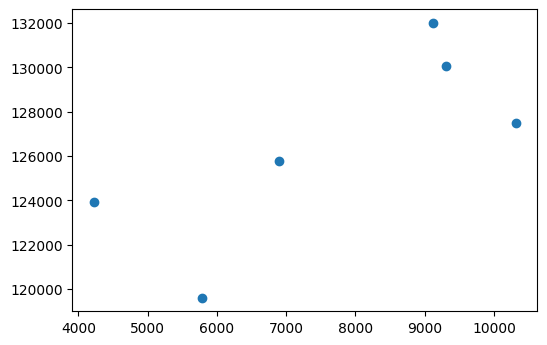

In [32]:
plt.scatter(averages['mean_price'], averages['avg_mileage'])
plt.show()

I decided to sort out our values based on the `avg_mileage` column and I added another column called `avg_mileage_to_price_ratio`. Based on my observations, our 'big 3' luxury brands (Audi, Mercedes Benz and BMW) seem to have a slight correlation between `avg_mileage` and `mean_price` as the price seems to be higher as the mileage decreases and vice versa. But that link isn't so strong with the other brands, such as comparing the Ford brand to the Volkswagen brand where Ford has a substantially lower `avg_mileage` value than Volkswagen, but it is also quite less expensive.

And for the `avg_mileage_to_price_ratio` column, in the absence of any other factors or features, from a consumer perspective, a higher number indicates a more economic value for the consumer and while a lower number would probably put it in the range of being more of a luxury purchase. If I have more time, I could potentially use this and other metrics to determine whether any given brand is a luxury brand or not.

## Conclusion

This concludes my observations for this dataset for now, but there are still additional transformations and further analysis that can be done with it. We can still do further cleaning such as converting the date columns to a more uniform format and possibly even translating the German words in our categorical data. For analysis, we can do more in-depth dives into our specific vehicle model types, looking at damaged vs. non-damaged vehicles, and so on.

I will continue to periodically come back to this dataset to reiterate and update with more insights, cleaning up and finding newer more efficient ways to expedite old processes! Thank you for your time!